In [1]:
# Chargement et étude rapide du jeu de données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
import statistics

from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_table("heart.dat", sep="\s+", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


Attribute Information:
------------------------
      -- 1. age       
      -- 2. sex       
      -- 3. chest pain type  (4 values)       
      -- 4. resting blood pressure  
      -- 5. serum cholestoral in mg/dl      
      -- 6. fasting blood sugar > 120 mg/dl       
      -- 7. resting electrocardiographic results  (values 0,1,2) 
      -- 8. maximum heart rate achieved  
      -- 9. exercise induced angina    
      -- 10. oldpeak = ST depression induced by exercise relative to rest   
      -- 11. the slope of the peak exercise ST segment     
      -- 12. number of major vessels (0-3) colored by flourosopy        
      -- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect     
-- Absence (1), or presence (2) of heart disease

In [4]:
# Renommer les colonnes et regarder les données manquantes (il n'y en a pas)
data.columns = ['age','sex','chest_pain_type','resting_blood_pressure','serum_cholestoral','fasting_blood_sugar',
'resting_electrocardiographic_results','maximum_heart_rate_achieved','exercise_induced_angina','oldpeak',
'slope','number_of_major_vessels','thal','label']
data.isnull().sum()

age                                     0
sex                                     0
chest_pain_type                         0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
label                                   0
dtype: int64

Nous remarquons l'abscence des valeurs nulles pour toutes nos variables

In [5]:
print(data.shape)
data

(270, 14)


,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,label
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


1    150
2    120
Name: label, dtype: int64


<AxesSubplot:xlabel='count', ylabel='label'>

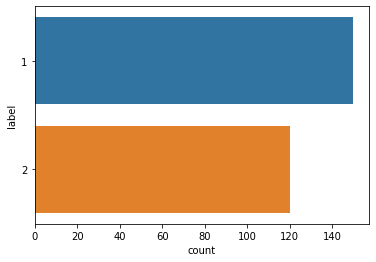

In [6]:
# Répartition graphique des réponses
print(data.label.value_counts())
sns.countplot(y="label", data=data)

Nous obersvons que nos données, ne sont pas équilibrées, en effet ceux qui souffrent d'un problème cardiaque sont moins nombreux par rapport aux personnes saines.
Il faut prendre cette situation dans l'échantillonage de données et le choix de la métrique.

<AxesSubplot:xlabel='label', ylabel='maximum_heart_rate_achieved'>

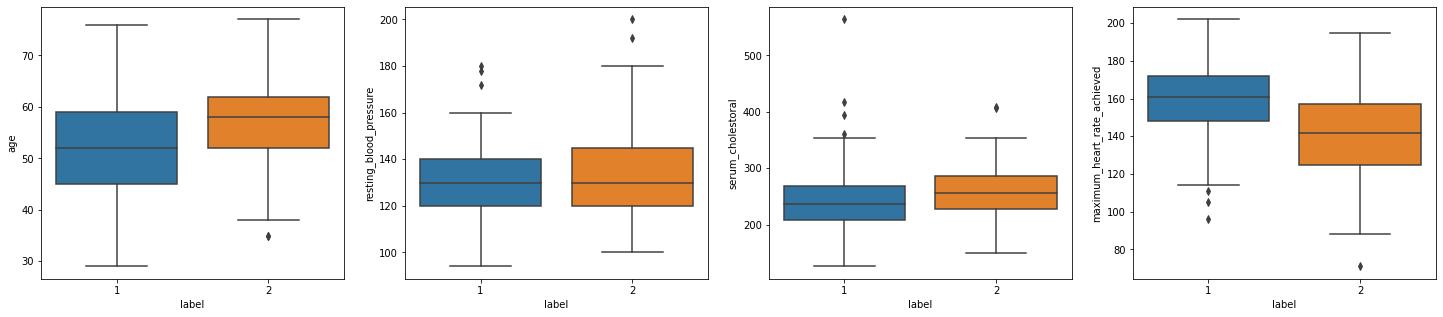

In [7]:
# Répartition graphique des exemples sur un tableau récapitulatif de qlq variables
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.boxplot(x='label',y='age',data=data)
plt.subplot(1,4,2)
sns.boxplot(x='label',y='resting_blood_pressure',data=data)
plt.subplot(1,4,3)
sns.boxplot(x='label',y='serum_cholestoral',data=data)
plt.subplot(1,4,4)
sns.boxplot(x='label',y='maximum_heart_rate_achieved',data=data)

Pour les variables quantitatives ci-dessus, nous observons la présence de quelques points abbérants 

<AxesSubplot:>

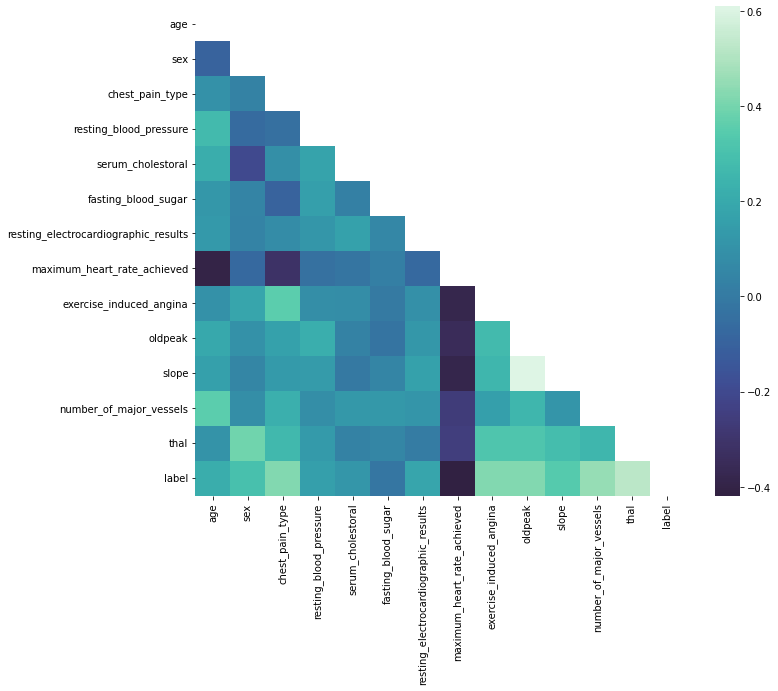

In [8]:
# Matrice de corrélations
data_corr = data.corr()

# masque triangulaire
mask = np.triu(np.ones_like(data_corr, dtype=bool))

# matplolib setup
f, ax = plt.subplots(figsize=(11, 9))

# matrice de corrélation avec masque trinagulaire inférieur
sns.heatmap(data_corr, mask=mask, cmap = 'mako', center=0, square=True)

In [8]:
X = data[data.columns[:-1]]
y = data[data.columns[-1:]]

D'abord, nous allons importer les modules et et classes que nous allons utiliser pour notre démarche.

In [9]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size= 0.80,random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])
pipe.score(X_test, y_test)

0.7407407407407407

Dans cette étape et avant toute manipulation, je vais séparer mes données sur trois groupes : un groupe pour l'apprentissage des paramètres (training_set), un groupe pour le choix des hypèr-paramètres (validation_ste) et un groupe pour tester la performance globale du modèle.


In [35]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,train_size= 0.80,random_state=0)


L'échelle des variables peut impacter négativement la performance de mon modèle, c'est pour cela que je vais définir une étape de transformation de données (normalisation) avant d'alimenter la data au modèle.

In [36]:
scaler= StandardScaler()
scaler.fit(X_train_val)

StandardScaler()

et puis nous allons transformer nos données d'entrainement, de validation et de test

In [37]:
X_train_val = scaler.transform(X_train_val)
X_test = scaler.transform(X_test)

Entrainemnt du modèle et choix des hypère-paramètres : utilisation de la validation croisée avec GridSearch pour le choix des hyper-paramètres

In [45]:
from sklearn.metrics import confusion_matrix

def my_score(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    tp = cm[0,0]
    tn = cm[1,1]
    fp = cm[1,0]
    fn = cm[0,1]
    acc = (tn + tp) / (tn + tp + fp + (fn*5))

    return acc

In [46]:
from sklearn.metrics import  make_scorer
my_scorer = make_scorer(my_score)


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


# Set the parameters by cross-validation
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
    {"kernel": ["poly"],"degree": [1,2,3,6], "C": [1, 10, 100, 1000]},
]




print("# Tuning hyper-parameters for the custum score")
print()

clf = GridSearchCV(SVC(), tuned_parameters, scoring=my_scorer)
clf.fit(X_train_val, y_train_val)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()



# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'degree': 3, 'kernel': 'poly'}

Grid scores on development set:

0.948 (+/-0.017) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.583 (+/-0.101) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.982 (+/-0.015) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.948 (+/-0.019) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.985 (+/-0.009) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.980 (+/-0.015) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.982 (+/-0.012) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.979 (+/-0.008) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.974 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.974 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.974 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.974 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}
0.980 (+/-0.011) for {'C': 1, 'degree': 1, 'kernel': 'poly'}
0.976 (+/-0.012) for {'C': 1, 'degree': 2, 'kernel

In [41]:
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.97      0.99        35
           2       1.00      0.97      0.99        36
           3       1.00      1.00      1.00        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       0.97      0.97      0.97        39
           8       0.95      1.00      0.97        39
           9       0.98      1.00      0.99        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360




In [ ]:
my_accuracy = (tn + tp) / (tn + tp + fp + (fn*5))
print('L’erreur de classification KNeighborsClassifier(15) avec cross_val (cv=5) est:', round( 1 - my_accuracy,2))